In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Смартфоны_from_1000_to_200000.csv')
df

,Unnamed: 0,Наименование,id,Скидка,Цена,Цена со скидкой,Бренд,id бренда,feedbacks,rating,Ссылка
0,0,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",121028588,36,21990,14073,Realme,48914,1116,5,https://www.wildberries.ru/catalog/121028588/d...
1,1,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",121028587,36,21990,14073,Realme,48914,1116,5,https://www.wildberries.ru/catalog/121028587/d...
2,2,Смартфон Reno 7 8+128 Гб,116872732,43,27990,15954,OPPO,10883,357,5,https://www.wildberries.ru/catalog/116872732/d...
3,3,Смартфон Reno 7 8+128 Гб,116872733,43,27990,15954,OPPO,10883,288,5,https://www.wildberries.ru/catalog/116872733/d...
4,4,SMART 6 PLUS 2+64GB,114477948,40,9990,5994,Infinix,252622,1813,5,https://www.wildberries.ru/catalog/114477948/d...
...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,Смартфон SMART 6 HD 2+32GB,141016049,0,12000,12000,Infinix,252622,0,0,https://www.wildberries.ru/catalog/141016049/d...
2796,2796,Смартфон Smart 6 32 ГБ синий,119985513,0,12000,12000,Infinix,252622,0,0,https://www.wildberries.ru/catalog/119985513/d...
2797,2797,"Смартфон C30 DS 2 Gb 32 Gb 6.82"" IPS 5 МП 13 +...",72819822,0,11990,11990,Nokia,16111,0,0,https://www.wildberries.ru/catalog/72819822/de...
2798,2798,Смартфон Y85 сенсорный мобильный телефон,140543014,20,14988,11990,VIVO,33526,0,0,https://www.wildberries.ru/catalog/140543014/d...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2800 non-null   int64 
 1   Наименование     2800 non-null   object
 2   id               2800 non-null   int64 
 3   Скидка           2800 non-null   int64 
 4   Цена             2800 non-null   int64 
 5   Цена со скидкой  2800 non-null   int64 
 6   Бренд            2738 non-null   object
 7   id бренда        2800 non-null   int64 
 8   feedbacks        2800 non-null   int64 
 9   rating           2800 non-null   int64 
 10  Ссылка           2800 non-null   object
dtypes: int64(8), object(3)
memory usage: 240.8+ KB


In [30]:
df.describe()

,Unnamed: 0,id,Скидка,Цена,Цена со скидкой,id бренда,feedbacks,rating
count,2800.000000,2.800000e+03,2800.000000,2800.000000,2800.000000,2.800000e+03,2800.000000,2800.000000
mean,1399.500000,1.092432e+08,15.983929,41297.617857,33362.864643,5.197907e+06,48.958571,2.471786
std,808.434702,2.791343e+07,15.459940,45734.265812,36187.360014,3.340298e+07,315.363777,2.369100
min,0.000000,6.358729e+06,0.000000,1290.000000,1290.000000,0.000000e+00,0.000000,0.000000
25%,699.750000,9.660325e+07,0.000000,12999.000000,10990.000000,6.049000e+03,0.000000,0.000000
50%,1399.500000,1.144407e+08,12.000000,20495.000000,17811.500000,1.946700e+04,1.000000,3.000000
75%,2099.250000,1.339057e+08,26.000000,49990.000000,40282.000000,4.891400e+04,10.000000,5.000000
max,2799.000000,1.410172e+08,95.000000,470000.000000,218032.000000,3.104710e+08,7890.000000,5.000000


In [31]:
df['rating'].value_counts()

0    1288
5    1106
4     281
3      60
1      43
2      22
Name: rating, dtype: int64

Оставляем только те смартфоны, у которых рейтинг > 0

In [32]:
df = df[df['rating']!=0]
df['rating'].value_counts()

5    1106
4     281
3      60
1      43
2      22
Name: rating, dtype: int64

Проверяем на наличие пустых значений

In [33]:
def get_cols_with_null(input_df):
    cols_null_percent = input_df.isnull().mean() * 100
    cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
    return cols_with_null

display(get_cols_with_null(df))

Бренд    0.529101
dtype: float64

Удаляем модели с отсутствующим брендом

In [34]:
df = df[df['Бренд'].notna()]
display(get_cols_with_null(df))

Series([], dtype: float64)

Смотрим малоинформативные признаки

In [35]:
inf_limit = 0.95
low_information_cols = [] 
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()
    nunique_ratio = df[col].nunique() / df[col].count()
    if top_freq > inf_limit:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > inf_limit:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Unnamed: 0: 100.0% уникальных значений
id: 100.0% уникальных значений
Ссылка: 100.0% уникальных значений


Удаляем Unnamed и id, ссылка скорее всего понадобится в дальнейшем, при ручном заполнении и проверке

In [36]:
df = df.drop(columns = ['Unnamed: 0', 'id'])
df

,Наименование,Скидка,Цена,Цена со скидкой,Бренд,id бренда,feedbacks,rating,Ссылка
0,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",36,21990,14073,Realme,48914,1116,5,https://www.wildberries.ru/catalog/121028588/d...
1,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",36,21990,14073,Realme,48914,1116,5,https://www.wildberries.ru/catalog/121028587/d...
2,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,10883,357,5,https://www.wildberries.ru/catalog/116872732/d...
3,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,10883,288,5,https://www.wildberries.ru/catalog/116872733/d...
4,SMART 6 PLUS 2+64GB,40,9990,5994,Infinix,252622,1813,5,https://www.wildberries.ru/catalog/114477948/d...
...,...,...,...,...,...,...,...,...,...
2764,Galaxy S5 SM-G900F 16GB,0,10990,10990,Samsung,5772,1,1,https://www.wildberries.ru/catalog/96896453/de...
2771,"Смартфон C25s 6,5"" 4+64гб HD+ 6000 мАч NFC",0,12990,12990,Realme,48914,1,5,https://www.wildberries.ru/catalog/46016394/de...
2786,Смартфон 10C 3GB 64GB серый,21,15990,12632,Redmi,50662,9,4,https://www.wildberries.ru/catalog/94669604/de...
2789,Смартфон Redmi Note 7 Pro сенсорный мобильный ...,13,14150,12310,Xiaomi,19467,1,5,https://www.wildberries.ru/catalog/140481763/d...


проверяем на наличие дубликатов, без учета ссылки

In [37]:
columns_names = list(df.columns)
columns_names.remove('Ссылка')
mask = df.duplicated(subset=columns_names)
num_duplicates = df[mask]
print(f'Число найденных дубликатов: {num_duplicates.shape[0]}')

Число найденных дубликатов: 385


In [38]:
df = df.drop_duplicates(subset=columns_names)
df

,Наименование,Скидка,Цена,Цена со скидкой,Бренд,id бренда,feedbacks,rating,Ссылка
0,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",36,21990,14073,Realme,48914,1116,5,https://www.wildberries.ru/catalog/121028588/d...
2,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,10883,357,5,https://www.wildberries.ru/catalog/116872732/d...
3,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,10883,288,5,https://www.wildberries.ru/catalog/116872733/d...
4,SMART 6 PLUS 2+64GB,40,9990,5994,Infinix,252622,1813,5,https://www.wildberries.ru/catalog/114477948/d...
5,NOTE 12 2023 8+256GB,35,22990,14943,Infinix,252622,118,5,https://www.wildberries.ru/catalog/128728547/d...
...,...,...,...,...,...,...,...,...,...
2740,Смартфон M5 4 128 ГБ 6.58 FHD+ MTK G99,18,16990,13931,POCO,132943,2,5,https://www.wildberries.ru/catalog/106176120/d...
2761,Смартфон Redmi 10C 64 Гб,31,18990,13103,Xiaomi,19467,2,5,https://www.wildberries.ru/catalog/90422386/de...
2763,Galaxy S5 SM-G900F 16GB,0,10990,10990,Samsung,5772,1,1,https://www.wildberries.ru/catalog/96896454/de...
2771,"Смартфон C25s 6,5"" 4+64гб HD+ 6000 мАч NFC",0,12990,12990,Realme,48914,1,5,https://www.wildberries.ru/catalog/46016394/de...


In [39]:
rating_count = df['rating'].value_counts(normalize=True).sort_index()*100.0
rating_count

1     3.306524
2     1.787310
3     4.468275
4    18.051832
5    72.386059
Name: rating, dtype: float64

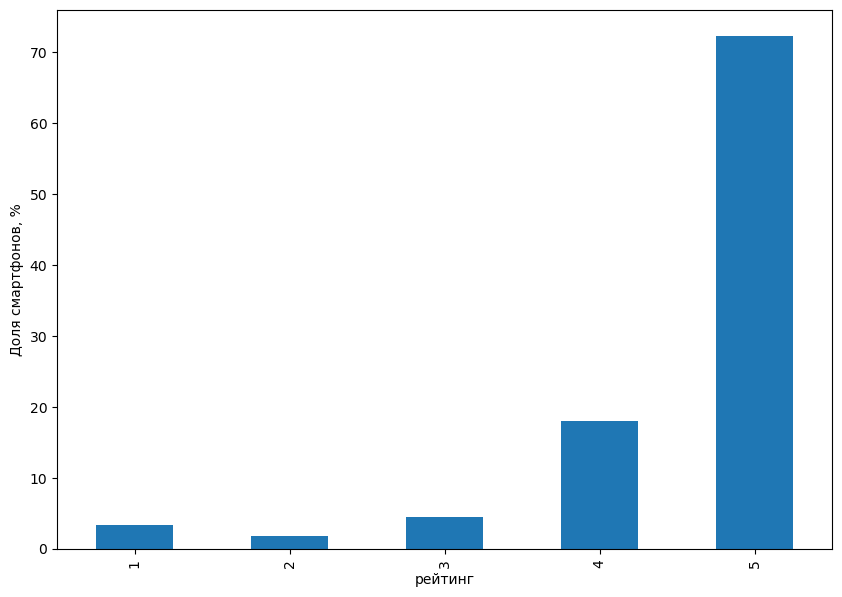

In [40]:
fig = plt.figure(figsize=(10, 7))
rating_count.plot.bar(ylabel='Доля смартфонов, %', xlabel='рейтинг');

Больше 70% смартфонов имеют рейтинг выше 70%

In [41]:
df['Бренд'].value_counts(normalize=True)

Samsung                                 0.210009
Xiaomi                                  0.152815
Realme                                  0.077748
Apple                                   0.067024
TECNO                                   0.058981
                                          ...   
SE 2020                                 0.000894
Apple Iphone 7 Plus 128 "Как новый"     0.000894
Samsung Galaxy S22 Ultra 8 ГБ/128 ГБ    0.000894
Origials                                0.000894
Apple .                                 0.000894
Name: Бренд, Length: 63, dtype: float64

**Бренды явно нужно пройти вручную т.к. уже видны повторы и наименование смартфона вместо бренда**

In [42]:
df['id бренда'].value_counts(normalize=True)

5772        0.210009
19467       0.152815
48914       0.077748
6049        0.067024
23233       0.058981
              ...   
39627709    0.000894
32017348    0.000894
19897810    0.000894
29554358    0.000894
1164116     0.000894
Name: id бренда, Length: 63, dtype: float64

Проверяем, соответствует ли количество смартфонов для бренда количеству смартфонов для его id. Т.к. соответствует, id бренда никакой доп смысловой нагрузки не несет и его можно удалить

In [43]:
sum([x-y for x, y in zip(df['Бренд'].value_counts().tolist(), df['id бренда'].value_counts().tolist())])

0

In [44]:
df = df.drop(columns = ['id бренда'])
df

,Наименование,Скидка,Цена,Цена со скидкой,Бренд,feedbacks,rating,Ссылка
0,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",36,21990,14073,Realme,1116,5,https://www.wildberries.ru/catalog/121028588/d...
2,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,357,5,https://www.wildberries.ru/catalog/116872732/d...
3,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,288,5,https://www.wildberries.ru/catalog/116872733/d...
4,SMART 6 PLUS 2+64GB,40,9990,5994,Infinix,1813,5,https://www.wildberries.ru/catalog/114477948/d...
5,NOTE 12 2023 8+256GB,35,22990,14943,Infinix,118,5,https://www.wildberries.ru/catalog/128728547/d...
...,...,...,...,...,...,...,...,...
2740,Смартфон M5 4 128 ГБ 6.58 FHD+ MTK G99,18,16990,13931,POCO,2,5,https://www.wildberries.ru/catalog/106176120/d...
2761,Смартфон Redmi 10C 64 Гб,31,18990,13103,Xiaomi,2,5,https://www.wildberries.ru/catalog/90422386/de...
2763,Galaxy S5 SM-G900F 16GB,0,10990,10990,Samsung,1,1,https://www.wildberries.ru/catalog/96896454/de...
2771,"Смартфон C25s 6,5"" 4+64гб HD+ 6000 мАч NFC",0,12990,12990,Realme,1,5,https://www.wildberries.ru/catalog/46016394/de...


Смотрим количество уникальных значений. **В дальнейшем можно подумать, какие из них использовать для группировки**

In [45]:
df.nunique()

Наименование        855
Скидка               59
Цена                498
Цена со скидкой     684
Бренд                63
feedbacks           175
rating                5
Ссылка             1119
dtype: int64

Вводим нвоый признак: средняя оценка пользователем

In [46]:
df['average_rating'] = df['rating'] / df['feedbacks']
df

,Наименование,Скидка,Цена,Цена со скидкой,Бренд,feedbacks,rating,Ссылка,average_rating
0,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",36,21990,14073,Realme,1116,5,https://www.wildberries.ru/catalog/121028588/d...,0.004480
2,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,357,5,https://www.wildberries.ru/catalog/116872732/d...,0.014006
3,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,288,5,https://www.wildberries.ru/catalog/116872733/d...,0.017361
4,SMART 6 PLUS 2+64GB,40,9990,5994,Infinix,1813,5,https://www.wildberries.ru/catalog/114477948/d...,0.002758
5,NOTE 12 2023 8+256GB,35,22990,14943,Infinix,118,5,https://www.wildberries.ru/catalog/128728547/d...,0.042373
...,...,...,...,...,...,...,...,...,...
2740,Смартфон M5 4 128 ГБ 6.58 FHD+ MTK G99,18,16990,13931,POCO,2,5,https://www.wildberries.ru/catalog/106176120/d...,2.500000
2761,Смартфон Redmi 10C 64 Гб,31,18990,13103,Xiaomi,2,5,https://www.wildberries.ru/catalog/90422386/de...,2.500000
2763,Galaxy S5 SM-G900F 16GB,0,10990,10990,Samsung,1,1,https://www.wildberries.ru/catalog/96896454/de...,1.000000
2771,"Смартфон C25s 6,5"" 4+64гб HD+ 6000 мАч NFC",0,12990,12990,Realme,1,5,https://www.wildberries.ru/catalog/46016394/de...,5.000000


**График вышел не сильно информативным, на первый взгляд**

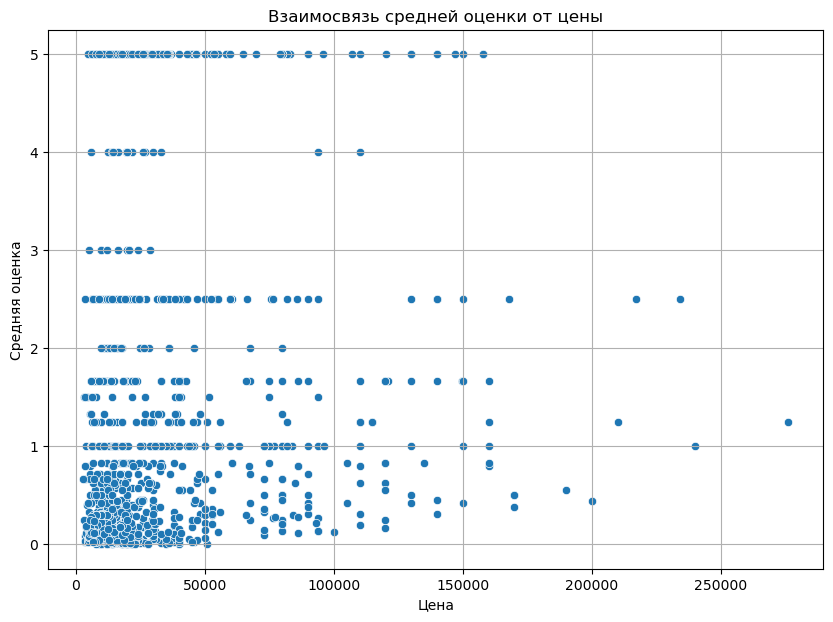

In [47]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=df,
    x="Цена",
    y="average_rating")
scatterplot.set_title('Взаимосвязь средней оценки от цены')
scatterplot.set_xlabel('Цена')
scatterplot.set_ylabel('Средняя оценка')
scatterplot.grid();

Добавляем признаки высокого рейтинга и высокого среднего рейтинга (>=4)

In [48]:
df['high_rating'] = np.where(df['rating']>=4, 1, 0)
df['high_average_rating'] = np.where(df['average_rating']>=4, 1, 0)
df

,Наименование,Скидка,Цена,Цена со скидкой,Бренд,feedbacks,rating,Ссылка,average_rating,high_rating,high_average_rating
0,"Смартфон 9 5G 4 128Gb 6.6"" 120 герц",36,21990,14073,Realme,1116,5,https://www.wildberries.ru/catalog/121028588/d...,0.004480,1,0
2,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,357,5,https://www.wildberries.ru/catalog/116872732/d...,0.014006,1,0
3,Смартфон Reno 7 8+128 Гб,43,27990,15954,OPPO,288,5,https://www.wildberries.ru/catalog/116872733/d...,0.017361,1,0
4,SMART 6 PLUS 2+64GB,40,9990,5994,Infinix,1813,5,https://www.wildberries.ru/catalog/114477948/d...,0.002758,1,0
5,NOTE 12 2023 8+256GB,35,22990,14943,Infinix,118,5,https://www.wildberries.ru/catalog/128728547/d...,0.042373,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2740,Смартфон M5 4 128 ГБ 6.58 FHD+ MTK G99,18,16990,13931,POCO,2,5,https://www.wildberries.ru/catalog/106176120/d...,2.500000,1,0
2761,Смартфон Redmi 10C 64 Гб,31,18990,13103,Xiaomi,2,5,https://www.wildberries.ru/catalog/90422386/de...,2.500000,1,0
2763,Galaxy S5 SM-G900F 16GB,0,10990,10990,Samsung,1,1,https://www.wildberries.ru/catalog/96896454/de...,1.000000,0,0
2771,"Смартфон C25s 6,5"" 4+64гб HD+ 6000 мАч NFC",0,12990,12990,Realme,1,5,https://www.wildberries.ru/catalog/46016394/de...,5.000000,1,1


In [49]:
df['high_rating'].value_counts()

1    1012
0     107
Name: high_rating, dtype: int64

In [50]:
df['high_average_rating'].value_counts()

0    968
1    151
Name: high_average_rating, dtype: int64

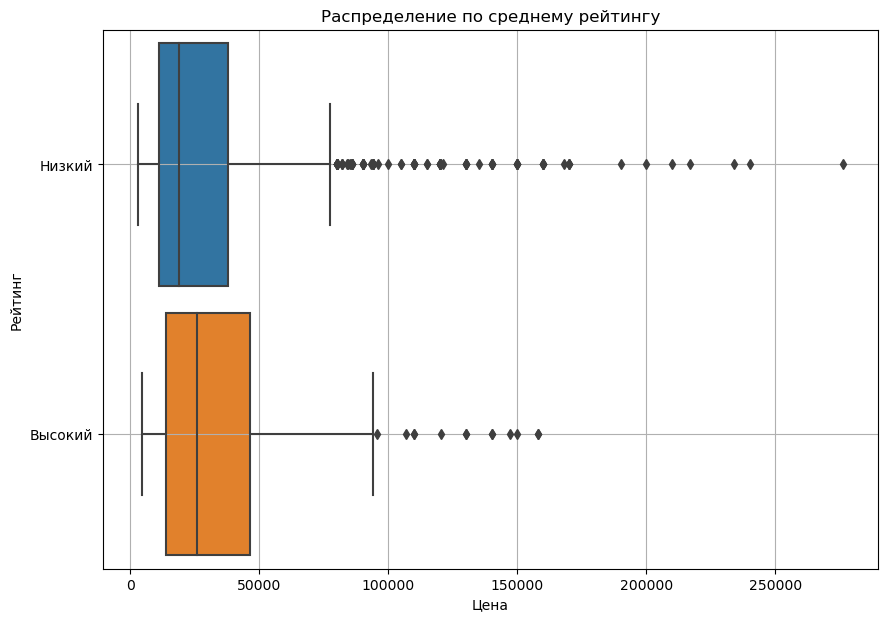

In [51]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='high_average_rating',
    x='Цена',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение по среднему рейтингу')
boxplot.set_xlabel('Цена')
boxplot.set_ylabel('Рейтинг')
boxplot.set_yticklabels(['Низкий','Высокий'])
boxplot.grid();

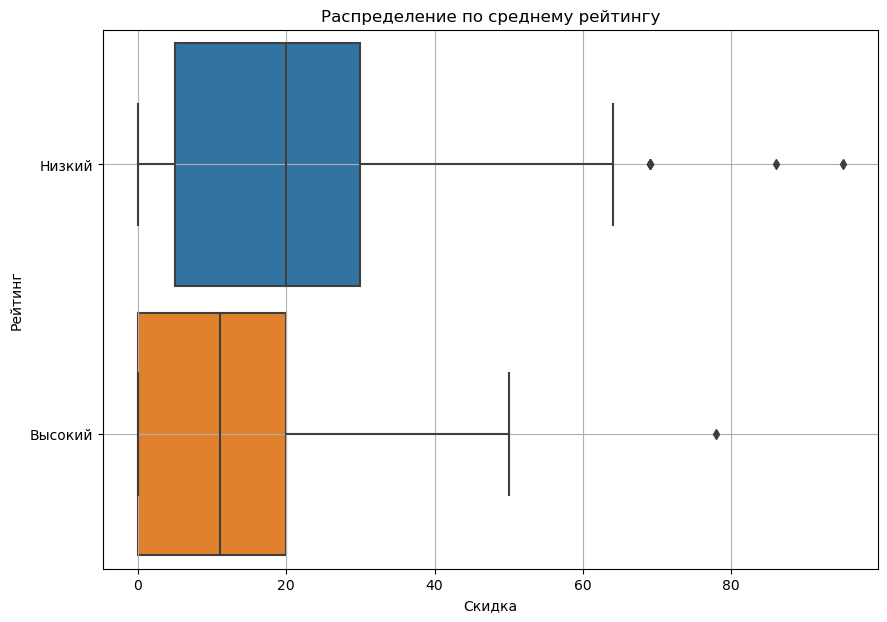

In [52]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='high_average_rating',
    x='Скидка',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение по среднему рейтингу')
boxplot.set_xlabel('Скидка')
boxplot.set_ylabel('Рейтинг')
boxplot.set_yticklabels(['Низкий','Высокий'])
boxplot.grid();

**Можно еще посмотреть рейтинг по брендам, возможно сгруппировав их, но уже после ручной обработки брендов в датасете.**